In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cyberbullying.data import Data
from cyberbullying.models import MLModel
from cyberbullying.utils import conf_mx_all

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import joblib

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [6]:
data = Data().get_data(datasets='all')

dict_keys(['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle'])
['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle']


In [9]:
data

,text,target
0,This: :One can make an analogy in mathematical...,0.0
1,` :Clarification for you (and Zundark's righ...,0.0
2,Elected or Electoral? JHK,0.0
3,`This is such a fun entry. Devotchka I once...,0.0
4,Please relate the ozone hole to increases in c...,0.0
...,...,...
230944,"""Never really gave it much thought. I just fig...",0.0
230945,"""Nadie se salva de la regla 34 xd""",0.0
230946,"""Question: Are you a boy or a girl?""",0.0
230947,"""Leave your email or phone number and maybe yo...",1.0


In [10]:
percentage_used = 1
data = data.sample(frac=percentage_used, random_state=0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[['text']], data['target'], test_size=0.3, random_state=0)

In [12]:
X_train.head()

,text
41325,:Could I please be unblocked?
63081,**** Carlo you should not have given in to...
20725,` I have reverted a recent edit you made to th...
167785,*: I would be entirely in favor of someone m...
101388,` == Reviewer granted == Hello. Your accoun...


In [13]:
package_model = MLModel()

In [14]:
package_model.vectorizer

TfidfVectorizer(min_df=3)

In [15]:
package_model.model

LinearSVC(C=1, class_weight={0: 0.22, 1: 0.78}, dual=False, penalty='l1')

In [16]:
package_model.set_pipeline()

In [17]:
package_model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.22, 1: 0.78}, dual=False,
                           penalty='l1'))])

In [18]:
from cyberbullying.transformers import CleanDFTransformer

In [19]:
X_train.shape

(161664, 1)

In [23]:
#transformer = CleanDFTransformer()

In [24]:
#X_train_2 = transformer.fit_transform(X_train)
#X_train_2

In [25]:
#X_train_2.shape

In [26]:
#X_train_2.isin([np.inf, -np.inf]).sum()

In [27]:
#X_train_2['text'].map(lambda text: type(text)).value_counts()

In [28]:
#X_train_2.isnull().sum()

In [29]:
y_train

41325     0.0
63081     0.0
20725     0.0
167785    0.0
101388    0.0
         ... 
136405    0.0
91714     0.0
180664    0.0
71438     1.0
124281    0.0
Name: target, Length: 161664, dtype: float64

In [30]:
y_train.isnull().sum()

0

In [31]:
#X_train_2['text'].sort_values()

In [32]:
#X_train_2['text'].map(lambda text: len(text)).sort_values()

In [33]:
#X_train_2.max()

In [34]:
#X_train_2.min()

In [35]:
y_train.min()

0.0

In [36]:
package_model.pipeline.fit(X_train, y_train)

ok


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.22, 1: 0.78}, dual=False,
                           penalty='l1'))])

In [37]:
from cyberbullying.utils import clean_df

In [39]:
y_pred = package_model.predict(X_test)

ok


In [40]:
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [41]:
y_pred_proba = package_model.predict_proba(X_test)

ok


In [42]:
y_pred_proba

array([[0.52342301, 0.47657699],
       [0.45051131, 0.54948869],
       [0.3860013 , 0.6139987 ],
       ...,
       [0.68267751, 0.31732249],
       [0.60838256, 0.39161744],
       [0.64744169, 0.35255831]])

In [43]:
y_pred_proba[:,0]

array([0.52342301, 0.45051131, 0.3860013 , ..., 0.68267751, 0.60838256,
       0.64744169])

Recall: 0.729
Precision: 0.632
Accuracy: 0.918
F1-score: 0.677


(0.729, 0.632, 0.918, 0.677)

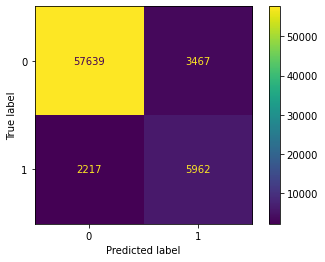

In [44]:
conf_mx_all(y_test, y_pred)

In [45]:
package_model.predict_all(X_test)

ok
ok


,text,proba_0,proba_1,prediction,color
216249,@mutaSawwif @TawheedNetwork_ Are you actually ...,0.523423,0.476577,0.0,None
200383,== Excuse you? == Did you just fart?,0.450511,0.549489,1.0,yellow
29777,MY IP IS DYNAMIC AND MY PENIS IS 10 INCHES LONG,0.386001,0.613999,1.0,yellow
9952,"` Hi, , Welcome to Wikipedia! I hope you l...",0.777679,0.222321,0.0,None
72162,"` Please do not vandalize pages, as you did ...",0.751598,0.248402,0.0,None
...,...,...,...,...,...
19723,"My two demands are, leave the flagship alone...",0.461151,0.538849,1.0,yellow
49595,::Note that someone tossed the page up for d...,0.667642,0.332358,0.0,None
131669,` Only thing relevant here is but ``THE' SHIT...,0.682678,0.317322,0.0,None
84864,`right about the body though it's quite possib...,0.608383,0.391617,0.0,None


In [46]:
X_test.iloc[4,:]['text']

'`   Please do not vandalize pages, as you did with this edit to Rhode Island. If you continue to do so, you will be blocked from editing.  \xa0–\xa0 `'

In [48]:
texto = '`   Please do not vandalize pages, as you did with this edit to Rhode Island. If you continue to do so, you will be blocked from editing.  \xa0–\xa0 `'

In [49]:
package_model.predict_simple_text(texto)

ValueError: Expected 2D array, got 1D array instead:
array=['`' 'Please' 'do' 'not' 'vandalize' 'pages,' 'as' 'you' 'did' 'with'
 'this' 'edit' 'to' 'Rhode' 'Island.' 'If' 'you' 'continue' 'to' 'do'
 'so,' 'you' 'will' 'be' 'blocked' 'from' 'editing.' '–' '`'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#package_model.predict_all(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [ ]:
#package_model.predict_simple_text(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')